# Airport Dataset
### Exploratory analysis and cleaning


In [1]:
# import your packages you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
%matplotlib inline
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')
np.random.seed(21)

In [2]:
# use pandas to import the airport skytrax data
airport=pd.read_csv(r'data\airport.csv', sep=',')

In [3]:
#check out the data to see what it looks like
airport.head()

,airport_name,link,title,author,author_country,date,content,experience_airport,date_visit,type_traveller,overall_rating,queuing_rating,terminal_cleanliness_rating,terminal_seating_rating,terminal_signs_rating,food_beverages_rating,airport_shopping_rating,wifi_connectivity_rating,airport_staff_rating,recommended
0,aalborg-airport,/airport-reviews/aalborg-airport,Aalborg Airport customer review,Klaus Malling,Denmark,2014-02-11,A small very effective airport with few flight...,NaN,NaN,NaN,9.0,5.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,1
1,aalborg-airport,/airport-reviews/aalborg-airport,Aalborg Airport customer review,S Kroes,Netherlands,2013-02-13,This is a nice and modern airport at the momen...,NaN,NaN,NaN,9.0,5.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,1
2,aalborg-airport,/airport-reviews/aalborg-airport,Aalborg Airport customer review,M Andersen,Denmark,2012-08-07,A very nice airy terminal - that seems modern ...,NaN,NaN,NaN,9.0,5.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,1
3,aalborg-airport,/airport-reviews/aalborg-airport,Aalborg Airport customer review,Paul Van Alsten,France,2011-05-22,AMS-AAL and quite satisfied with this regional...,NaN,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,3.0,NaN,NaN,0
4,aalborg-airport,/airport-reviews/aalborg-airport,Aalborg Airport customer review,K Fischer,NaN,2010-08-04,Very quick check-inn and security screening. N...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
#see some statistics about the dataset, mean, standard deviation, min, max ... ect
airport.describe()

,overall_rating,queuing_rating,terminal_cleanliness_rating,terminal_seating_rating,terminal_signs_rating,food_beverages_rating,airport_shopping_rating,wifi_connectivity_rating,airport_staff_rating,recommended
count,13796.000000,12813.000000,12815.000000,587.000000,27.000000,630.000000,12676.000000,412.000000,26.000000,17721.000000
mean,4.274355,2.747912,3.442450,2.580920,2.592593,2.169841,2.821631,2.405340,2.038462,0.221206
std,2.722765,1.572520,1.337508,1.403862,1.393923,1.534358,1.410575,1.579452,1.248384,0.415071
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.500000,0.000000
75%,6.000000,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,0.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,1.000000


In [5]:
#take a look at the columns, their data type and number of values in each column
airport.info()

# later when we start cleaning, we can remove the columns that have few rows, like "terminal_seating_rating",
# "terminal_signs_rating", "food_beverages_rating", "wifi_connectivity_rating"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17721 entries, 0 to 17720
Data columns (total 20 columns):
airport_name                   17721 non-null object
link                           17721 non-null object
title                          17721 non-null object
author                         17721 non-null object
author_country                 12777 non-null object
date                           17721 non-null object
content                        17721 non-null object
experience_airport             647 non-null object
date_visit                     593 non-null object
type_traveller                 646 non-null object
overall_rating                 13796 non-null float64
queuing_rating                 12813 non-null float64
terminal_cleanliness_rating    12815 non-null float64
terminal_seating_rating        587 non-null float64
terminal_signs_rating          27 non-null float64
food_beverages_rating          630 non-null float64
airport_shopping_rating        12676 non-null floa

In [6]:
# names of columns
airport.columns

Index(['airport_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'experience_airport', 'date_visit', 'type_traveller',
       'overall_rating', 'queuing_rating', 'terminal_cleanliness_rating',
       'terminal_seating_rating', 'terminal_signs_rating',
       'food_beverages_rating', 'airport_shopping_rating',
       'wifi_connectivity_rating', 'airport_staff_rating', 'recommended'],
      dtype='object')

0    13801
1     3920
Name: recommended, dtype: int64


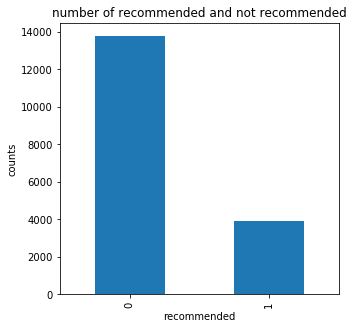

In [7]:
#countplot of recommended (0=no, 1=yes), the dataset is clearly unbalanced 
counts = airport.recommended.value_counts()
print(counts)
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
counts.plot.bar(ax = ax)
ax.set_title("number of recommended and not recommended")
ax.set_xlabel("recommended")
ax.set_ylabel("counts")

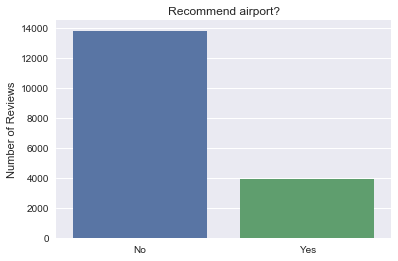

In [8]:
#same plot using seaborn
sns.set(style="darkgrid")
ax=sns.countplot(x='recommended', data=airport)
ax.set_title("Recommend airport?")
ax.set_xticklabels(["No","Yes"])
ax.set_xlabel(" ")
ax.set_ylabel("Number of Reviews")


# the airports that have the most reviews  ( more than 200)

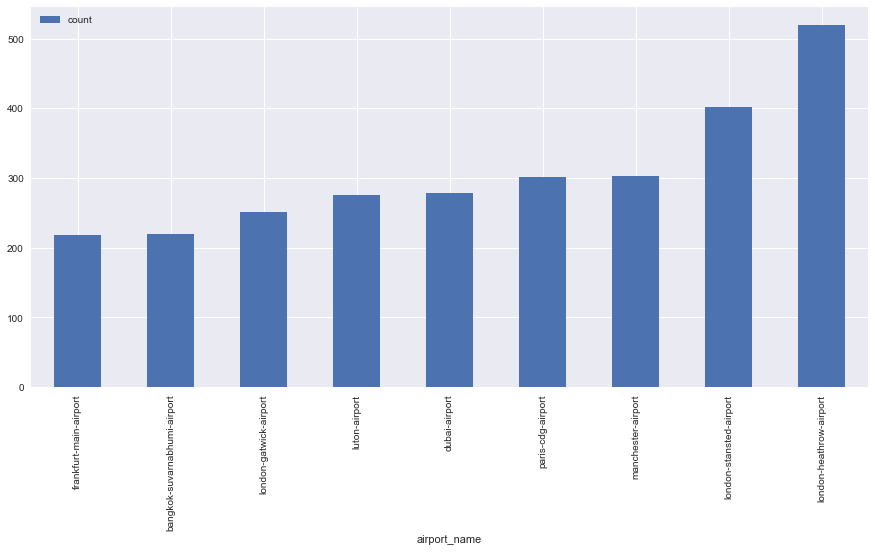

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
group = airport.groupby(['airport_name'])['recommended'].count().reset_index(name='count')
group.sort_values(by='count',inplace=True)
group = group[group['count'] > 200]
group.plot.bar(x='airport_name',y='count',ax=ax)


In [10]:
group.sort_values(by='count',inplace=True)
group = group[group['count'] >200]
group

,airport_name,count
242,frankfurt-main-airport,218
60,bangkok-suvarnabhumi-airport,220
409,london-gatwick-airport,252
420,luton-airport,275
210,dubai-airport,279
519,paris-cdg-airport,301
437,manchester-airport,303
411,london-stansted-airport,402
410,london-heathrow-airport,520


# counts of each class for top airports 

In [11]:
names = group.airport_name
new = airport[airport['airport_name'].isin(names)]
new.groupby('airport_name')['recommended'].value_counts()

airport_name                  recommended
bangkok-suvarnabhumi-airport  0              151
                              1               69
dubai-airport                 0              216
                              1               63
frankfurt-main-airport        0              175
                              1               43
london-gatwick-airport        0              163
                              1               89
london-heathrow-airport       0              360
                              1              160
london-stansted-airport       0              361
                              1               41
luton-airport                 0              247
                              1               28
manchester-airport            0              238
                              1               65
paris-cdg-airport             0              253
                              1               48
Name: recommended, dtype: int64

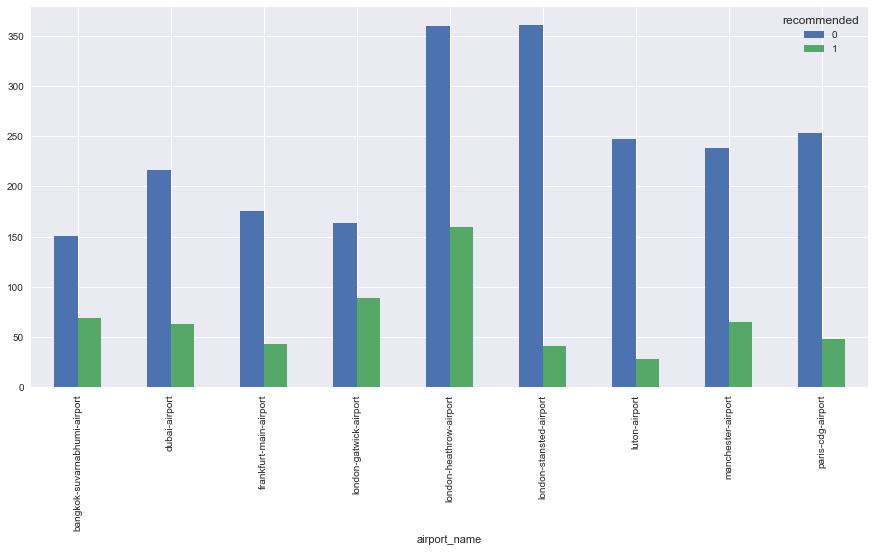

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
new.groupby('airport_name').recommended.value_counts().unstack().plot.bar(ax=ax)

# pd.crosstab(new['airport_name'],new['recommended']).plot.bar()




# the airports that have the most positive reviews  ( more than 50)

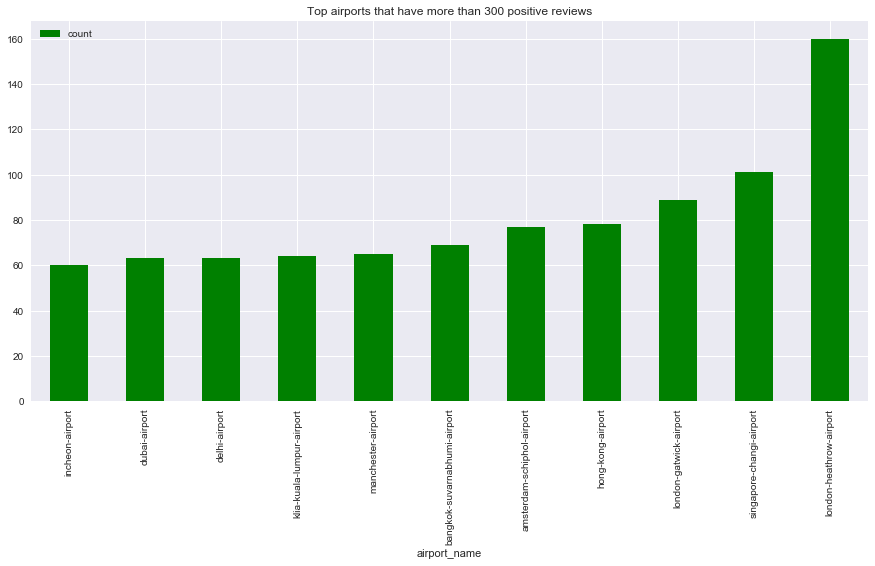

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
group_pos = airport.groupby(['airport_name'])['recommended'].sum().reset_index(name='count')
group_pos.sort_values(by='count',inplace=True)
group_pos = group_pos[group_pos['count'] > 50]
ax.set_title('Top airports that have more than 300 positive reviews')
group_pos.plot.bar(x='airport_name',y='count',ax=ax,color="g")

In [14]:
group_pos.sort_values(by='count',inplace=True)
# group = group[group['count'] >500]
group_pos

,airport_name,count
316,incheon-airport,60
210,dubai-airport,63
195,delhi-airport,63
366,klia-kuala-lumpur-airport,64
437,manchester-airport,65
60,bangkok-suvarnabhumi-airport,69
31,amsterdam-schiphol-airport,77
304,hong-kong-airport,78
409,london-gatwick-airport,89
624,singapore-changi-airport,101


In [15]:
# subset the data to just the variables we need, remove variables that have no correlation with the "recommended" column,
# or columns that have few observations
# and columns that has no effect on the rating, like 'link', 'title', 'author', 'author_country', 'date' .. ect

airport=airport[['content','queuing_rating', 'terminal_cleanliness_rating','overall_rating','airport_shopping_rating','recommended']]
airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17721 entries, 0 to 17720
Data columns (total 6 columns):
content                        17721 non-null object
queuing_rating                 12813 non-null float64
terminal_cleanliness_rating    12815 non-null float64
overall_rating                 13796 non-null float64
airport_shopping_rating        12676 non-null float64
recommended                    17721 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 830.8+ KB


In [16]:
# see the correlation bewtween the new features
airport.corr().style.background_gradient()

,queuing_rating,terminal_cleanliness_rating,overall_rating,airport_shopping_rating,recommended
queuing_rating,1,0.52433,0.678784,0.500906,0.542552
terminal_cleanliness_rating,0.52433,1,0.576671,0.638852,0.443754
overall_rating,0.678784,0.576671,1,0.632182,0.825783
airport_shopping_rating,0.500906,0.638852,0.632182,1,0.493278
recommended,0.542552,0.443754,0.825783,0.493278,1


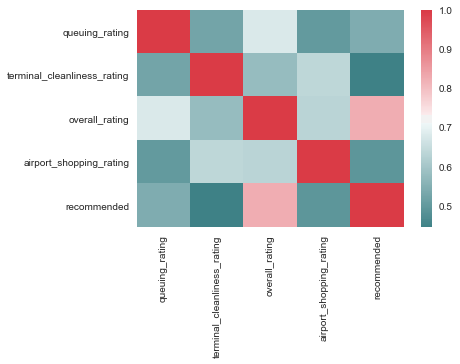

In [17]:
# correlation map using seaborn
corr = airport.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(200, 10, as_cmap=True))

In [18]:
# we have missing data for several of these variables so we will need to drop them
airport = airport.dropna()

In [19]:
# the new data after removing the missing data
airport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10849 entries, 0 to 17720
Data columns (total 6 columns):
content                        10849 non-null object
queuing_rating                 10849 non-null float64
terminal_cleanliness_rating    10849 non-null float64
overall_rating                 10849 non-null float64
airport_shopping_rating        10849 non-null float64
recommended                    10849 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 593.3+ KB


In [20]:
#check out the new dataset after cleaning 
airport.head()

,content,queuing_rating,terminal_cleanliness_rating,overall_rating,airport_shopping_rating,recommended
0,A small very effective airport with few flight...,5.0,5.0,9.0,4.0,1
1,This is a nice and modern airport at the momen...,5.0,4.0,9.0,4.0,1
2,A very nice airy terminal - that seems modern ...,5.0,5.0,9.0,4.0,1
3,AMS-AAL and quite satisfied with this regional...,5.0,5.0,5.0,3.0,0
11,This airport gets worse on a monthly basis. Th...,1.0,3.0,2.0,1.0,0


In [21]:
# function to get the sentiment of each text
def sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return 1 if polarity > 0.1 else 0

In [22]:
#adding a new column to the dataset, it contains the sentiment of each review
airport['sentiment'] = airport.content.apply(sentiment)

In [23]:
# number of positive and negative sentiment in the dataset
airport.sentiment.value_counts()

0    6019
1    4830
Name: sentiment, dtype: int64

In [24]:
# taking a look at the dataset after adding the sentiment column
airport.head()

,content,queuing_rating,terminal_cleanliness_rating,overall_rating,airport_shopping_rating,recommended,sentiment
0,A small very effective airport with few flight...,5.0,5.0,9.0,4.0,1,1
1,This is a nice and modern airport at the momen...,5.0,4.0,9.0,4.0,1,0
2,A very nice airy terminal - that seems modern ...,5.0,5.0,9.0,4.0,1,1
3,AMS-AAL and quite satisfied with this regional...,5.0,5.0,5.0,3.0,0,1
11,This airport gets worse on a monthly basis. Th...,1.0,3.0,2.0,1.0,0,0


In [25]:
# check the correlation between "sentiment" and "recommended"

airport.sentiment.corr(airport.recommended)

0.38021676603553289

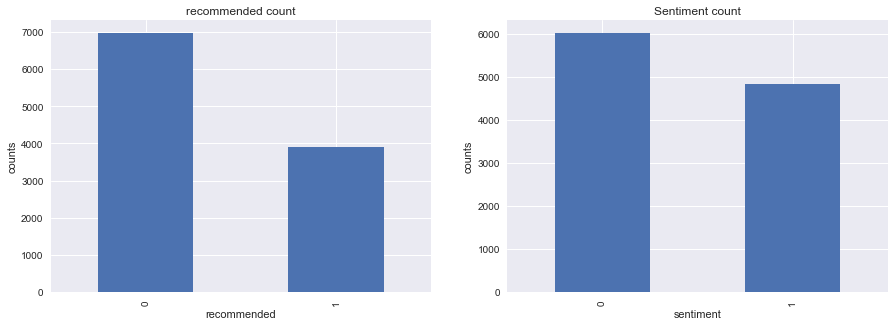

In [26]:
#plotting the count of recommended and sentiment to have an idea about them
counts_recommended = airport.recommended.value_counts()
counts_sentiment = airport.sentiment.value_counts()
fig, (ax1, ax2)= plt.subplots(1,2)
fig.set_size_inches(15,5)
counts_recommended.plot.bar(ax = ax1)
ax1.set_title("recommended count")
ax1.set_xlabel("recommended")
ax1.set_ylabel("counts")
counts_sentiment.plot.bar(ax = ax2)
ax2.set_title("Sentiment count")
ax2.set_xlabel("sentiment")
ax2.set_ylabel("counts")

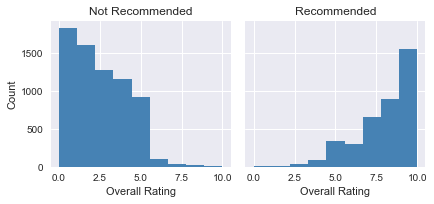

In [27]:
#rating by recommend or not. This is obviously expected, the overall rating is correlated with the recommendation
sns.set(style="darkgrid")
g = sns.FacetGrid(airport, col="recommended", margin_titles=True)
bins = np.linspace(0, 10, 10)
g.map(plt.hist, "overall_rating", color="steelblue", bins=bins)
axes = g.axes.flatten()
axes[0].set_title("Not Recommended")
axes[1].set_title("Recommended")
axes[0].set_ylabel("Count")
for ax in axes:
    ax.set_xlabel("Overall Rating")

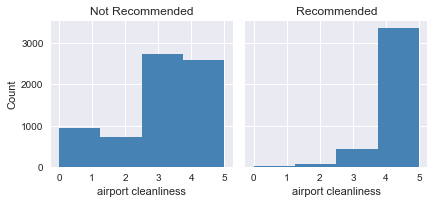

In [28]:
# rating by airport cleanliness.

g = sns.FacetGrid(airport, col="recommended", margin_titles=True)
bins = np.linspace(0, 5, 5)
g.map(plt.hist, "terminal_cleanliness_rating", color="steelblue", bins=bins)
axes = g.axes.flatten()
axes[0].set_title("Not Recommended")
axes[1].set_title("Recommended")
axes[0].set_ylabel("Count")
for ax in axes:
    ax.set_xlabel("airport cleanliness")

# Training the Classifiers

##### Train/Test Split

This test size is 20% of the dataset and the training set is the rest 80% 

In [29]:
#Split data into train/test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(airport, airport['recommended'], test_size=0.2)

print('training set: '  + str(len(x_train)))
print('test set: '+ str(len(x_test)))


training set: 8679
test set: 2170


###### Importing necessary packages

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

### we will try these classifiers to see how they perform on all the features

In [31]:
used_features = ['queuing_rating', 'terminal_cleanliness_rating','overall_rating','airport_shopping_rating','sentiment']

Classifiers = [
    BaggingClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(),
    LinearSVC(),
    AdaBoostClassifier(),
    MLPClassifier(),
    KNeighborsClassifier()]

names = [
    'Bagging',
    'Random Forest',
    'Decision Tree',
    'Logistic Regression',
    'SVM',
    'Adaboost',
    'Neural Network',
    'KNN']

for classifier, name in zip(Classifiers,names):
    model = classifier.fit(x_train[used_features],y_train)
    pred = model.predict(x_test[used_features])
    accuracy = accuracy_score(pred,y_test)
    f1 = f1_score(pred,y_test)
    print( name +' ------> Accuracy: ' +str(accuracy)) 

Bagging ------> Accuracy: 0.94331797235
Random Forest ------> Accuracy: 0.942857142857
Decision Tree ------> Accuracy: 0.942396313364
Logistic Regression ------> Accuracy: 0.946543778802
SVM ------> Accuracy: 0.945622119816
Adaboost ------> Accuracy: 0.948387096774
Neural Network ------> Accuracy: 0.943778801843
KNN ------> Accuracy: 0.948847926267


### as the results are pretty close, we're going to keep just 4 classifiers to carry the rest of our work

##### the 4 classifiers we're going to use: Logistic regression ,SVM, Adaboost, Neural Network

In [32]:
Classifiers = [
    LogisticRegression(),
    LinearSVC(),
    AdaBoostClassifier(),
    MLPClassifier()] 

###### function to train the four classifiers and print the accuracy of each one of them

In [33]:
def train(used_features):
    Accuracy=[]
    Model=['Logistic Regression', 'SVM', 'AdaBoost', 'Neural Network']
    for classifier,name in zip(Classifiers,Model):
        model = classifier.fit(x_train[used_features],y_train)
        pred = model.predict(x_test[used_features])
        accuracy = accuracy_score(pred,y_test)
        f1 = f1_score(pred,y_test)
        Accuracy.append(accuracy)
        print('Accuracy of '+ name +' is '+str(accuracy * 100)) 
        print('Confusion Matrix\n')
        print(pd.DataFrame(confusion_matrix(pred, y_test, labels=[1, 0]), index=['true:1', 'true:0'], columns=['pred:1', 'pred:0']))
        print('\n')
        print(classification_report(pred, y_test))
        print('----------------------------------------------------------')
    for i in range(len(Accuracy)):
        Accuracy[i] *= 100
    return Accuracy,Model

###### function to plot the results


In [34]:
def plot(Accuracy,Model):
    Index = [1,2,3,4]
    plt.rcParams["figure.figsize"] = [10,5]
    plt.bar(Index,Accuracy,width= 0.3,linewidth=1,color=['red','blue','orange','purple'])
    plt.xticks(Index, Model,rotation=50)
    plt.ylabel('Accuracy', fontsize=15)
    plt.yticks(np.arange(0,101,10))
    plt.xlabel('Model', fontsize=15)
    plt.title('Accuracies of Models', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)

## First combination:  Using all features

Accuracy of Logistic Regression is 94.6543778802
Confusion Matrix

        pred:1  pred:0
true:1     705      25
true:0      91    1349


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1440
           1       0.89      0.97      0.92       730

   micro avg       0.95      0.95      0.95      2170
   macro avg       0.93      0.95      0.94      2170
weighted avg       0.95      0.95      0.95      2170

----------------------------------------------------------
Accuracy of SVM is 94.5622119816
Confusion Matrix

        pred:1  pred:0
true:1     705      27
true:0      91    1347


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1438
           1       0.89      0.96      0.92       732

   micro avg       0.95      0.95      0.95      2170
   macro avg       0.93      0.95      0.94      2170
weighted avg       0.95      0.95      0.95      2170

---------------------------

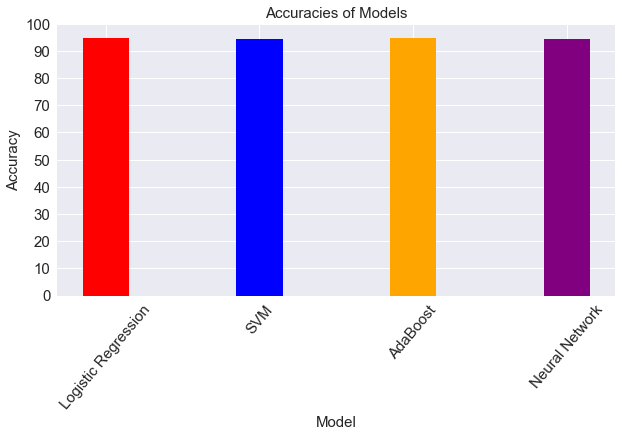

In [35]:
used_features = ['queuing_rating', 'terminal_cleanliness_rating','overall_rating','airport_shopping_rating','sentiment']
acc, models = train(used_features=used_features)
plot(acc, models)

## Second combination: removing "sentiment"

Accuracy of Logistic Regression is 94.6082949309
Confusion Matrix

        pred:1  pred:0
true:1     705      26
true:0      91    1348


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1439
           1       0.89      0.96      0.92       731

   micro avg       0.95      0.95      0.95      2170
   macro avg       0.93      0.95      0.94      2170
weighted avg       0.95      0.95      0.95      2170

----------------------------------------------------------
Accuracy of SVM is 94.5622119816
Confusion Matrix

        pred:1  pred:0
true:1     705      27
true:0      91    1347


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1438
           1       0.89      0.96      0.92       732

   micro avg       0.95      0.95      0.95      2170
   macro avg       0.93      0.95      0.94      2170
weighted avg       0.95      0.95      0.95      2170

---------------------------

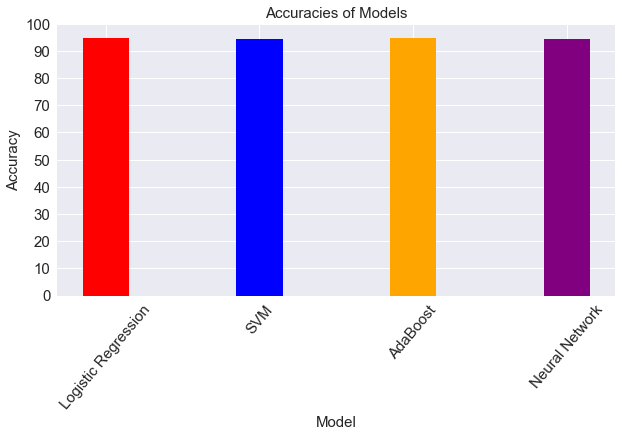

In [36]:
used_features = ['queuing_rating', 'terminal_cleanliness_rating','overall_rating','airport_shopping_rating']
acc, models = train(used_features=used_features)
plot(acc, models)

## Third combination: removing "terminal_cleanilness_rating"


Accuracy of Logistic Regression is 94.6543778802
Confusion Matrix

        pred:1  pred:0
true:1     705      25
true:0      91    1349


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1440
           1       0.89      0.97      0.92       730

   micro avg       0.95      0.95      0.95      2170
   macro avg       0.93      0.95      0.94      2170
weighted avg       0.95      0.95      0.95      2170

----------------------------------------------------------
Accuracy of SVM is 94.6082949309
Confusion Matrix

        pred:1  pred:0
true:1     705      26
true:0      91    1348


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1439
           1       0.89      0.96      0.92       731

   micro avg       0.95      0.95      0.95      2170
   macro avg       0.93      0.95      0.94      2170
weighted avg       0.95      0.95      0.95      2170

---------------------------

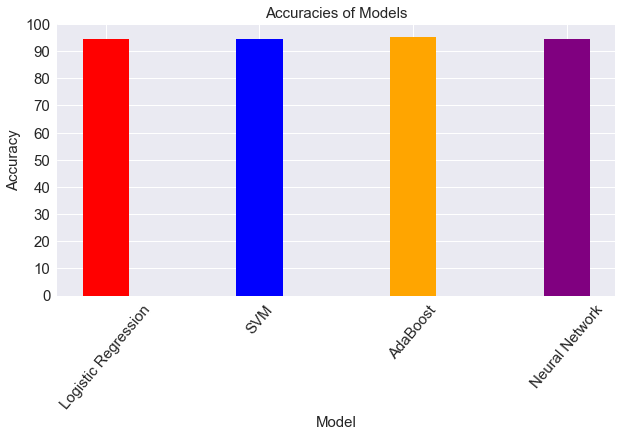

In [37]:
used_features = ['queuing_rating','overall_rating','airport_shopping_rating','sentiment']
acc, models = train(used_features=used_features)
plot(acc, models)

## Fourth combination: removing "overall_rating" 

Accuracy of Logistic Regression is 78.202764977
Confusion Matrix

        pred:1  pred:0
true:1     528     205
true:0     268    1169


              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1437
           1       0.66      0.72      0.69       733

   micro avg       0.78      0.78      0.78      2170
   macro avg       0.76      0.77      0.76      2170
weighted avg       0.79      0.78      0.78      2170

----------------------------------------------------------
Accuracy of SVM is 78.801843318
Confusion Matrix

        pred:1  pred:0
true:1     550     214
true:0     246    1160


              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1406
           1       0.69      0.72      0.71       764

   micro avg       0.79      0.79      0.79      2170
   macro avg       0.77      0.77      0.77      2170
weighted avg       0.79      0.79      0.79      2170

-----------------------------

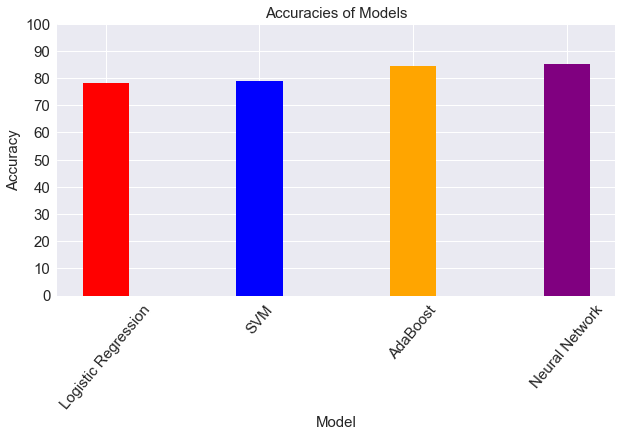

In [38]:
used_features = ['queuing_rating', 'terminal_cleanliness_rating','airport_shopping_rating','sentiment']
acc, models = train(used_features=used_features)
plot(acc, models)

## Fifth combination: using only "overall_rating"

Accuracy of Logistic Regression is 94.6543778802
Confusion Matrix

        pred:1  pred:0
true:1     705      25
true:0      91    1349


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1440
           1       0.89      0.97      0.92       730

   micro avg       0.95      0.95      0.95      2170
   macro avg       0.93      0.95      0.94      2170
weighted avg       0.95      0.95      0.95      2170

----------------------------------------------------------
Accuracy of SVM is 94.6543778802
Confusion Matrix

        pred:1  pred:0
true:1     705      25
true:0      91    1349


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1440
           1       0.89      0.97      0.92       730

   micro avg       0.95      0.95      0.95      2170
   macro avg       0.93      0.95      0.94      2170
weighted avg       0.95      0.95      0.95      2170

---------------------------

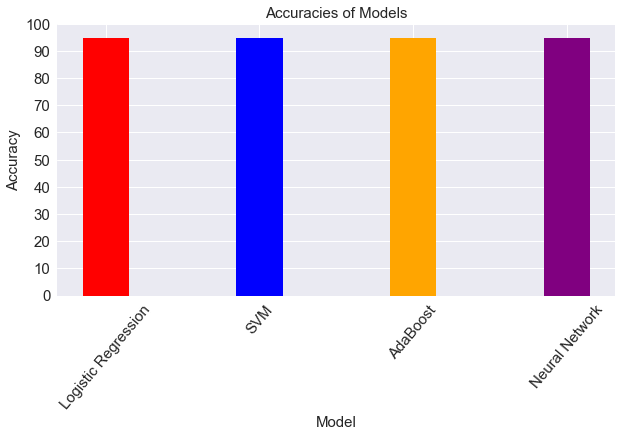

In [39]:
used_features = ['overall_rating']
acc, models = train(used_features=used_features)
plot(acc, models)

### Sixth combination: Using  'queuing_rating', 'terminal_cleanliness_rating','airport_shopping_rating'

Accuracy of Logistic Regression is 77.8341013825
Confusion Matrix

        pred:1  pred:0
true:1     529     214
true:0     267    1160


              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1427
           1       0.66      0.71      0.69       743

   micro avg       0.78      0.78      0.78      2170
   macro avg       0.75      0.76      0.76      2170
weighted avg       0.78      0.78      0.78      2170

----------------------------------------------------------
Accuracy of SVM is 78.1105990783
Confusion Matrix

        pred:1  pred:0
true:1     548     227
true:0     248    1147


              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1395
           1       0.69      0.71      0.70       775

   micro avg       0.78      0.78      0.78      2170
   macro avg       0.76      0.76      0.76      2170
weighted avg       0.78      0.78      0.78      2170

---------------------------

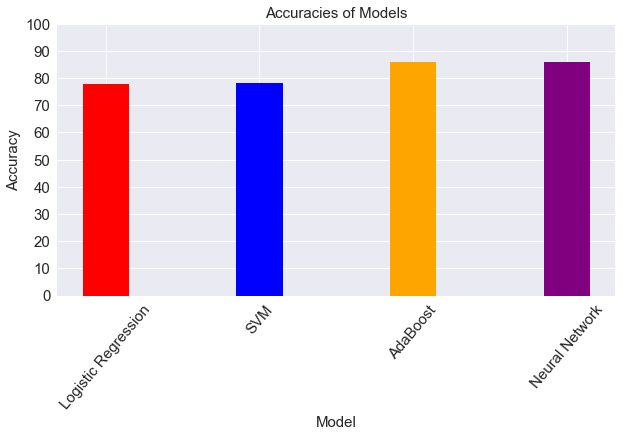

In [40]:
used_features = ['queuing_rating', 'terminal_cleanliness_rating','airport_shopping_rating']
acc, models = train(used_features=used_features)
plot(acc, models)

## Seventh combination: Using "overall_rating" and "queuing_rating"

Accuracy of Logistic Regression is 94.6543778802
Confusion Matrix

        pred:1  pred:0
true:1     705      25
true:0      91    1349


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1440
           1       0.89      0.97      0.92       730

   micro avg       0.95      0.95      0.95      2170
   macro avg       0.93      0.95      0.94      2170
weighted avg       0.95      0.95      0.95      2170

----------------------------------------------------------
Accuracy of SVM is 94.6543778802
Confusion Matrix

        pred:1  pred:0
true:1     705      25
true:0      91    1349


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1440
           1       0.89      0.97      0.92       730

   micro avg       0.95      0.95      0.95      2170
   macro avg       0.93      0.95      0.94      2170
weighted avg       0.95      0.95      0.95      2170

---------------------------

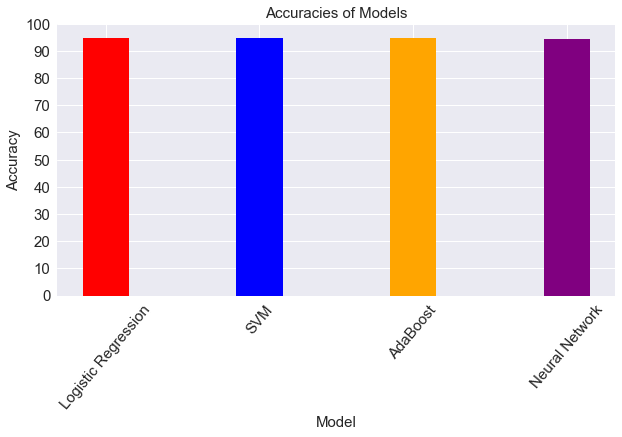

In [41]:
used_features = ['queuing_rating','overall_rating']
acc, models = train(used_features=used_features)
plot(acc, models)

## The best model is : third combination (removing "terminal_cleanilness_rating") 95.34%, with Adaboost, so we will use this to classify a new example

In [44]:
used_features = ['queuing_rating','overall_rating','airport_shopping_rating','sentiment']
model = AdaBoostClassifier().fit(x_train[used_features],y_train)

# now you can give your ratings in the following cell

In [46]:
queuing_rating = int(input('queuing_rating: '))
overall_rating = int(input('overall rating: '))
airport_shopping_rating = int(input('airport_shopping_rating: '))
content = input('review message: ')
sentiment_ = sentiment(content) #------------- هنا يتم حساب ال sentiment 

d = {'queuing_rating':[queuing_rating],
     'overall_rating': [overall_rating],
     'airport_shopping_rating': [airport_shopping_rating],
     'sentiment': [sentiment_]}
df = pd.DataFrame(data=d)
df = df[used_features]
np.asscalar(model.predict(df))

queuing_rating: 4
overall rating: 7
airport_shopping_rating: 3
review message: good airport


1

## as you can see the result is 1, which means the user will recommend this airport, lets try with another example

In [47]:
queuing_rating = int(input('queuing_rating: '))
overall_rating = int(input('overall rating: '))
airport_shopping_rating = int(input('airport_shopping_rating: '))
content = input('review message: ')
sentiment_ = sentiment(content)

d = {'queuing_rating':[queuing_rating],
     'overall_rating': [overall_rating],
     'airport_shopping_rating': [airport_shopping_rating],
     'sentiment': [sentiment_]}
df = pd.DataFrame(data=d)
df = df[used_features]
np.asscalar(model.predict(df))

queuing_rating: 2
overall rating: 4
airport_shopping_rating: 2
review message: bad airport


0

## as you can see here the result is 0, which means the user will not recommend the airline,if you want to try another example just run the cell again, and enter your ratings in the end you will see the results